In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
from scipy.interpolate import griddata
from datetime import datetime, timedelta
import gsw
import datetime
import cartopy.crs as ccrs
from pathlib import Path
import cmasher as cmr
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=14

In [2]:
ds1=xr.open_mfdataset('./EXP_tpre02_prsn02_2012/dc_count_201[6,7]_EXP_tpre02_prsn02_2012.nc')
ds1=ds1.rename({'lon':'nav_lon','lat':'nav_lat'})
ds2=xr.open_mfdataset('./EXP_tpre02_prsn02_2012/mld_201[6,7].nc')
ds2=ds2.rename({'nav_lon_grid_T':'nav_lon','nav_lat_grid_T':'nav_lat'})

bat=xr.open_dataset('../MAUD_RISE_config/maud_v4/m12_mask/1_domain_cfg_50levels_new.nc')

ds=xr.merge((ds2,bat.bathy_meter),compat='override')
ds=ds.isel(x=slice(4,-4),y=slice(4,-4))
ds.coords['year']=ds.time_counter.dt.year
ds.coords['month']=ds.time_counter.dt.month
ds.coords['day']=ds.time_counter.dt.day
ds.coords['dayofyear']=ds.time_counter.dt.dayofyear

In [3]:
#defining the threshold for deep convection
dc_thres=830

In [77]:
#identify the onset of deep convection in the year
dcs16=np.int(ds.dayofyear.where((ds.mldr10_1>dc_thres)&(ds.year==2016)).min(dim='time_counter').min().values)
print(dcs16)
#identify the onset of deep convection in each grid cell
dcstart2016=xr.where((ds.mldr10_1.where(ds.year==2016,drop=True).isel(time_counter=dcs16-1)>=dc_thres),1,0)

199


/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


In [78]:
dcs17=np.int(ds.dayofyear.where((ds.mldr10_1>dc_thres)&(ds.year==2017)).min(dim='time_counter').min().values)
print(dcs17)
dcstart2017=xr.where((ds.mldr10_1.where(ds.year==2017,drop=True).isel(time_counter=dcs17-1)>=dc_thres),1,0)


181


/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


In [79]:
dcspread16=(ds.dayofyear.where((ds.mldr10_1>=dc_thres)&(ds.year==2016)).min(dim='time_counter')-dcs16)
dcspread17=(ds.dayofyear.where((ds.mldr10_1>=dc_thres)&(ds.year==2017)).min(dim='time_counter')-dcs17)

/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


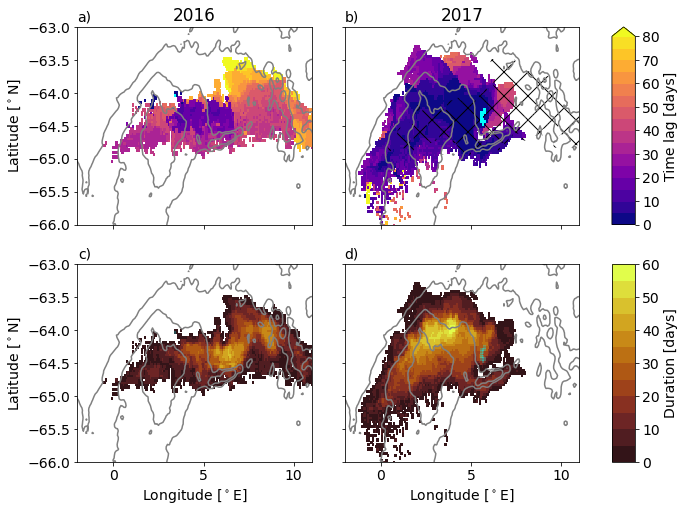

In [83]:
from matplotlib import colors as c

dmax=80
dmin=0
dlev=17
dmap='plasma'
cMap_c4= c.ListedColormap([(0.0,0,0,0),(0,1,1,1)]) #green
fig,axes=plt.subplots(2,3,figsize=(10,8),gridspec_kw={'width_ratios':[1,1,.1]})
ax=axes[0,0]
(ds.dayofyear.where((ds.mldr10_1>dc_thres)&(ds.year==2016)).min(dim='time_counter')-dcs16).plot.pcolormesh(x="nav_lon",y="nav_lat",vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,ax=ax,add_colorbar=False)
dcstart2016.where(dcstart2016>0).plot.pcolormesh(x="nav_lon",y="nav_lat",ax=ax,vmin=0,vmax=2,cmap=cMap_c4,add_colorbar=False)
ds.bathy_meter.where(ds.bathy_meter<10).plot.contourf(x="nav_lon",y="nav_lat",colors='grey',add_colorbar=False,ax=ax)
ds.bathy_meter.plot.contour(x="nav_lon",y="nav_lat",levels=[2500,3500,5000],colors='grey',ax=ax)
ax.set_title('2016')
ax.set_xlim(-2,11)
ax.set_ylim(-66,-63)
ax.set_ylabel('Latitude [$^\circ$N]')
ax.set_xlabel('')
ax.set_xticklabels('')
ax.text(0.03, 1.05, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')
ax=axes[0,1]
cb=(ds.dayofyear.where((ds.mldr10_1>dc_thres)&(ds.year==2017)).min(dim='time_counter')-dcs17).plot.pcolormesh(x="nav_lon",y="nav_lat",vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,ax=ax,add_colorbar=False)
dcspread16.plot.contourf(x="nav_lon",y="nav_lat",hatches='x',colors='w',ax=ax,alpha=0,add_colorbar=False)
dcstart2017.where(dcstart2017>0).plot.pcolormesh(x="nav_lon",y="nav_lat",ax=ax,vmin=0,vmax=2,cmap=cMap_c4,add_colorbar=False)
ds.bathy_meter.where(ds.bathy_meter<10).plot.contourf(x="nav_lon",y="nav_lat",colors='grey',add_colorbar=False,ax=ax)
ds.bathy_meter.plot.contour(x="nav_lon",y="nav_lat",levels=[2500,3500,5000],colors='grey',ax=ax)
ax.set_title('2017')
ax.set_xlim(-2,11)
ax.set_ylim(-66,-63)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.text(0.03, 1.05, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

plt.colorbar(cb,cax=axes[0,2], label='Time lag [days]')

from matplotlib import colors as c

dmax=60
dmin=0
dlev=13
dmap=cmo.solar
cMap_c4= c.ListedColormap([(0.0,0,0,0),(0,1,1,0.25)]) #green
ax=axes[1,0]
(ds1.dc_830.where(ds1.dc_830>0).isel(year=0)).plot.pcolormesh(x="nav_lon",y="nav_lat",vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,ax=ax,add_colorbar=False)
dcstart2016.where(dcstart2016>0).plot.pcolormesh(x="nav_lon",y="nav_lat",ax=ax,vmin=0,vmax=2,cmap=cMap_c4,add_colorbar=False)
ds.bathy_meter.where(ds.bathy_meter<10).plot.contourf(x="nav_lon",y="nav_lat",colors='grey',add_colorbar=False,ax=ax)
ds.bathy_meter.plot.contour(x="nav_lon",y="nav_lat",levels=[2500,3500,5000],colors='grey',ax=ax)
ax.set_title('')
ax.set_xlim(-2,11)
ax.set_ylim(-66,-63)
ax.set_ylabel('Latitude [$^\circ$N]')
ax.set_xlabel('Longitude [$^\circ$E]')
ax.text(0.03, 1.05, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')
ax=axes[1,1]
cb=(ds1.dc_830.where(ds1.dc_830>0).isel(year=1)).plot.pcolormesh(x="nav_lon",y="nav_lat",vmin=dmin,vmax=dmax,levels=dlev,cmap=dmap,ax=ax,add_colorbar=False)
#dcspread16.plot.contourf(x="nav_lon",y="nav_lat",hatches='x',colors='w',ax=ax,alpha=0,add_colorbar=False)
dcstart2017.where(dcstart2017>0).plot.pcolormesh(x="nav_lon",y="nav_lat",ax=ax,vmin=0,vmax=2,cmap=cMap_c4,add_colorbar=False)
ds.bathy_meter.where(ds.bathy_meter<10).plot.contourf(x="nav_lon",y="nav_lat",colors='grey',add_colorbar=False,ax=ax)
ds.bathy_meter.plot.contour(x="nav_lon",y="nav_lat",levels=[2500,3500,5000],colors='grey',ax=ax)
ax.set_title('')
ax.set_xlim(-2,11)
ax.set_ylim(-66,-63)
ax.set_ylabel('')
ax.set_xlabel('Longitude [$^\circ$E]')
ax.set_yticklabels('')

ax.text(0.03, 1.05, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')

plt.colorbar(cb,cax=axes[1,2], label='Duration [days]',ticks=np.linspace(dmin,dmax,7))
plt.savefig('./dc_timelag_duration_%d.png'%dmax)


In [74]:
print((ds1.dc_830.where(ds1.dc_830>0).isel(year=0)).max().values)
print((ds1.dc_830.where(ds1.dc_830>0).isel(year=1)).max().values)

47.0
59.0


In [75]:
# Compare this to the observed ice opening locations
dso16=xr.open_mfdataset('/home/birte/observation/sea_ice/reduced_data/sic_20160725.nc')
dso17=xr.open_mfdataset('/home/birte/observation/sea_ice/reduced_data/sic_20170903.nc')
dso=xr.merge((dso16,dso17))
dso.coords['year']=dso.time.dt.year
dso.coords['month']=dso.time.dt.month
dso.coords['day']=dso.time.dt.day

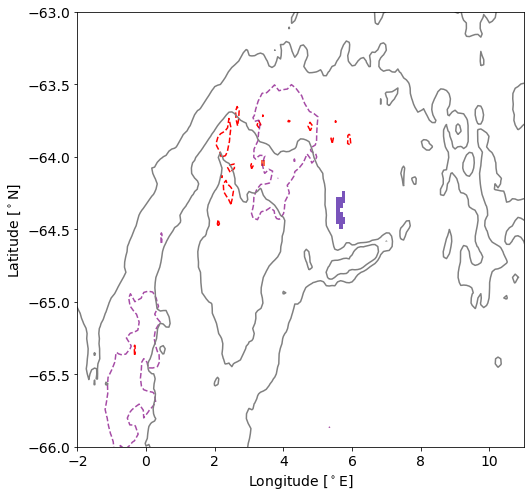

In [85]:
# Figure 5 
plt.figure(figsize=(8,8))
dcstart2016.where(dcstart2016>0).plot.pcolormesh(x="nav_lon",y="nav_lat",vmin=0,vmax=2,cmap='Reds',add_colorbar=False)
dso.z.isel(time=0).plot.contour(x="lon",y="lat",levels=[50],colors='r',linestyles='--')

dcstart2017.where(dcstart2017>0).plot.pcolormesh(x="nav_lon",y="nav_lat",vmin=-.5,vmax=2,cmap=cmo.dense,add_colorbar=False)
dso.z.isel(time=1).plot.contour(x="lon",y="lat",levels=[50],colors='purple',alpha=0.7,linestyles='--')

ds.bathy_meter.where(ds.bathy_meter<10).plot.contourf(x="nav_lon",y="nav_lat",colors='grey',add_colorbar=False)
c=ds.bathy_meter.plot.contour(x="nav_lon",y="nav_lat",levels=[2500,3500,5000],colors='grey')
#plt.clabel(c,fmt = '%2.0f',fontsize=12, inline=False,colors='k')#True,inline_spacing=0.0001) #,fmt = '%2.0f'
plt.xlim(-2,11)
plt.ylim(-66,-63)
plt.ylabel('Latitude [$^\circ$N]')
plt.xlabel('Longitude [$^\circ$E]')

plt.title('')
plt.savefig('./dc_initial_toseaice.jpg',dpi=300)